In [1]:
#imported all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import train ccsa file 
df=pd.read_csv("C:\\Users\\singh\\Downloads\\Malignant-Comments-Classifier-Project\\Malignant Comments Classifier Project\\train.csv")

In [3]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
#lets import test csv file
df_test=pd.read_csv("C:\\Users\\singh\\Downloads\\Malignant-Comments-Classifier-Project\\Malignant Comments Classifier Project\\test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


# EDA(Exploratory Data Analysis):

In [5]:
#lets check the names of the columns present in the train dataset 
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

 Here we can see all the names of the columns present in our train dataset with malignant as our target column

In [6]:
#lets check the name of the columns present in the test dataset
df_test.columns

Index(['id', 'comment_text'], dtype='object')

#here we can see the names of the columns present in our test dataset

In [7]:
#lets check shape of the train dataset
df.shape

(159571, 8)

here we can see there are 1,59,571 rows present in 8 columns of train dataset

In [8]:
#lets check the information about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


here we can see that there are no Null values present in our train dataset

In [9]:
#lets check the information regarding the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


 here we can see that there are no null values present in the dataset as well

In [10]:
#lets check the value counts of all the columns in the train dataset
df.value_counts()

id                comment_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [11]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

here 0 denotes No and 1 denotes Yes.so most of the message are not Malignant

In [12]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

 here also we can see very few message are highly Malignant

In [13]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

here also we can see few message are rude

In [14]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

here we can see very few message have threat content

In [15]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

 here we can see few message have abusive language

In [16]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

here we can see that there are few message have loathe or disgusting language

In [17]:
#lets check the datatype of all the columns present in the train 
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

here we can see that there are two types of dtype present in the train dataset i.e object and integer dtype.

.here we can see that there is 1st column name id, id  are unique for all the comments dataset and it wont help in our model building,it will make the model more complex and less accurate.so,we must drop this column. 

In [18]:
#lets drop the column id from train dataset
df.drop('id',axis=1,inplace=True)

here we are again confirmed that there are are no null values present in this train dataset

In [19]:
#lets check few comments present in the train dataset
df['comment_text'][12]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [20]:
df['comment_text'][27]

"Yes, because the mother of the child in the case against Michael Jackson was studied in here motives and reasonings and judged upon her character just as harshly as Wacko Jacko himself.  Don't tell me to ignore it and incriminate myself.  I am going to continue refuting the bullshit that Jayjg keeps throwing at me.   18:01, 16 Jun 2005 (UTC)"

In [21]:
df['comment_text'][117]

'Also see this if you cant trust Murkoth Ramunni\nhttp://books.google.com/books?id=HHev0U1GfpEC&pg;=PA51&dq;=Thiyya+matrilineal&hl;=en&sa;=X&ei;=TlpPUd2aH8mWiQLgvIDgBA&ved;=0CDYQ6AEwAQ#v=onepage&q;=Thiyya%20matrilineal&f;=false'

here after observing some comments,we can clearly see that there is a need of text processing as there are many numbers,alphabets and sp]

In [22]:
#lets create a new column showing length of words in comment text in train dataset
df['before_clean']=df['comment_text'].map(lambda comment_text:len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [23]:
#lets create a new column named before clean showing no, of words present in comment_text column in test dataset
df_test['before_clean']=df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,before_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Text Processing:

In [24]:
#lets download latest updated stopwords and wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words=stopwords.words('english')
lemmatizer=wordnet.WordNetLemmatizer()
 #lets clean the message and remove or replace some words
def edited(text):
    #convert to lower case 
    lowered_text = text.lower()
    
    #replacing email addresses with 'email-addresses'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress',lowered_text)
    
    #replace URLs with 'webaddresses'
    text = re.sub(r'http\S+','webaddresses',text)
    
    #removing numbers
    text = re.sub(r'[0-9]'," ",text)
    
    #removing the HTML tags
    text = re.sub(r"<.*?>"," ",text)
    
    #removing punctuation
    text = re.sub(r'[^\w\s]',' ',text)
    text =re.sub(r'\_',' ',text)
                  
    #removing all the non-ascii characters
    clean_words = re.sub(r'[^\x00-\x7f]',r'',text)
    
    #removing all unwanted white space
    text = " ".join(text.split()) 
     
    #lets remove '\n' in comment_text
    text = re.sub(r'\n',' ',text)
                  
    #splitting data into words
    tokenized_text = word_tokenize(text)
                  
    #removoing remaing tokens that are not alphabetic, removing stop words and lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
    
    return " ".join(removed_stop_text)

In [27]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['len_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,116


In [28]:
#lets import wordcloud to jupyter notebook
! pip install wordcloud

In [29]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
def wcloud(df, label):
    
    # lets print only rows where the label value is 1 (ie. where comment is harsh)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

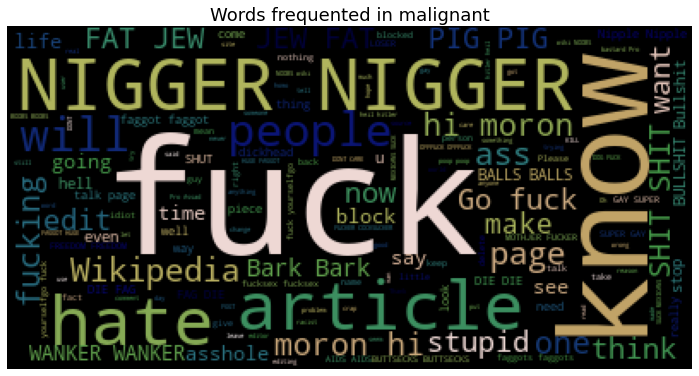

In [31]:
df_m=df.loc[:,['comment_text','malignant']]
wcloud(df_m,'malignant')

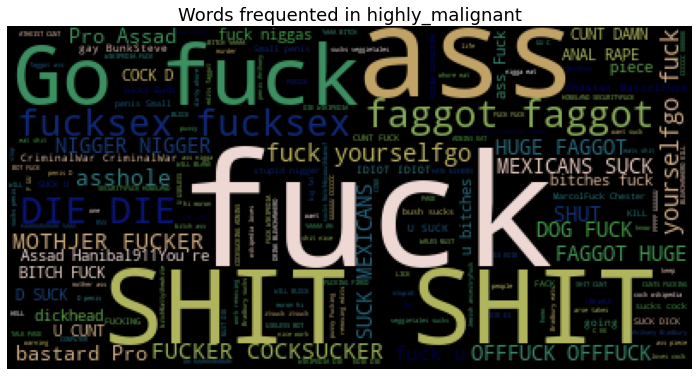

In [32]:
df_hm=df.loc[:,['comment_text','highly_malignant']]
wcloud(df_hm,'highly_malignant')

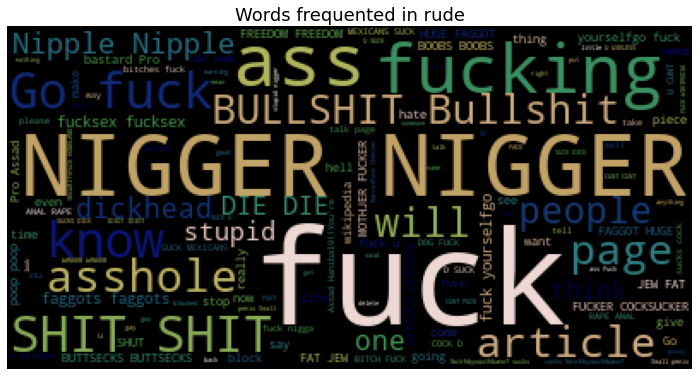

In [33]:
df_r=df.loc[:,['comment_text','rude']]
wcloud(df_r,'rude')

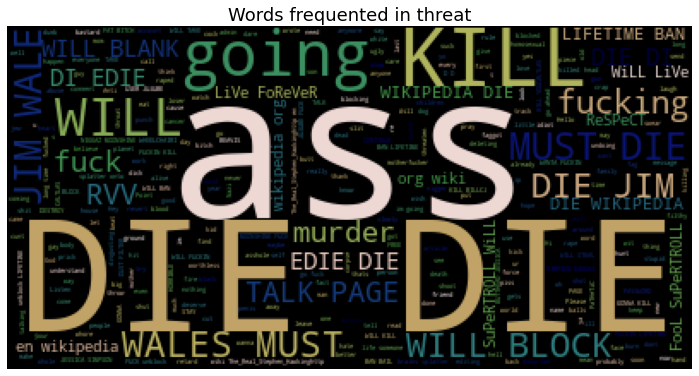

In [34]:
df_t=df.loc[:,['comment_text','threat']]
wcloud(df_t,'threat')

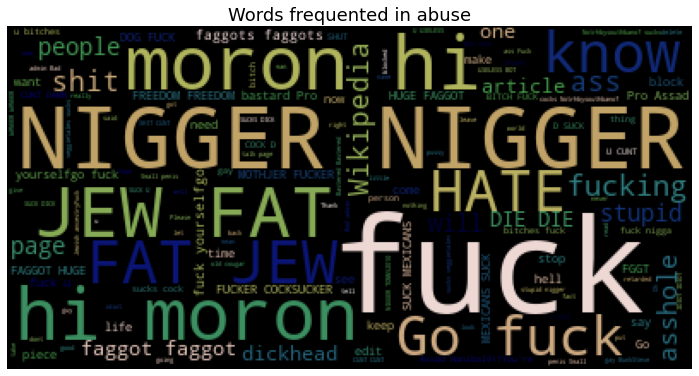

In [35]:
df_a=df.loc[:,['comment_text','abuse']]
wcloud(df_a,'abuse')

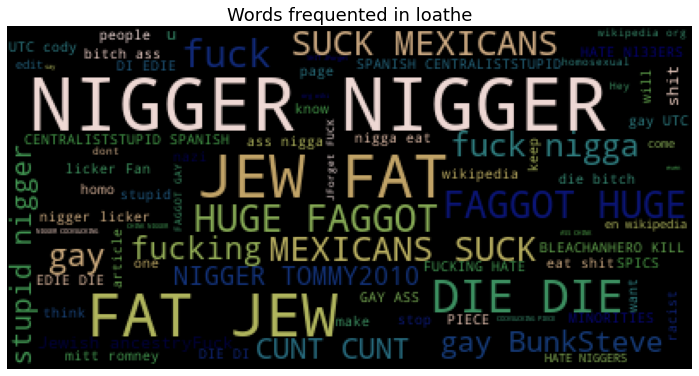

In [36]:
df_l=df.loc[:,['comment_text','loathe']]
wcloud(df_l,'loathe')

# Visualization

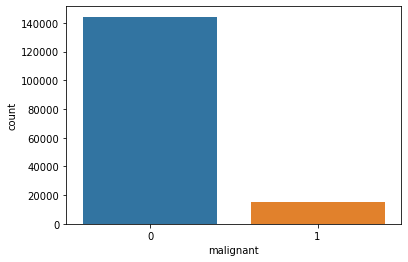

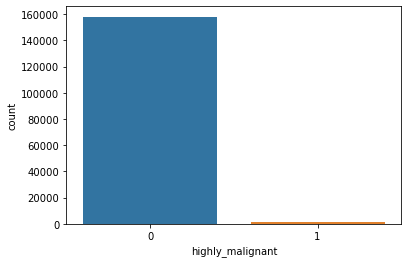

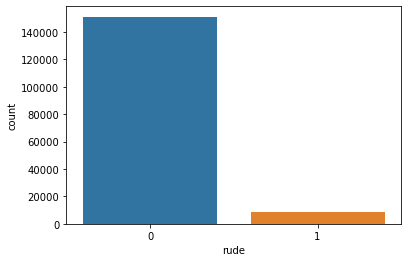

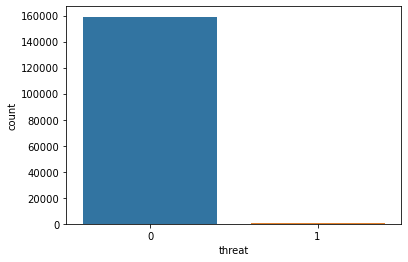

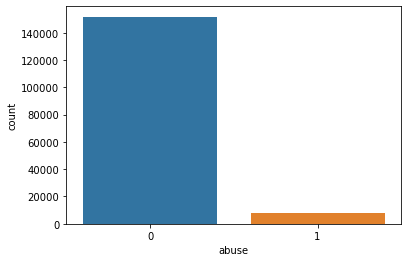

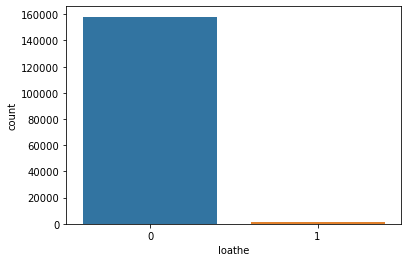

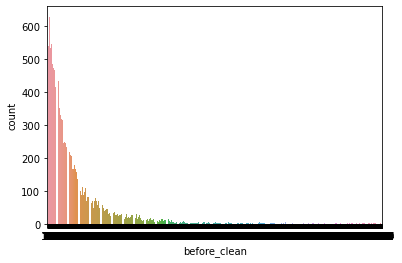

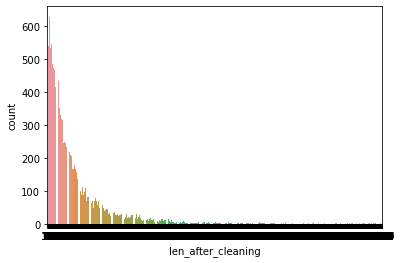

In [37]:
#lets plot all features using countplot
feat = df.columns[1:]
for col in feat:
    sns.countplot(df[col])
    plt.show()

In [38]:
#lets create a list of features columns
featu=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [39]:
#lets store the no. of counts for every target
counts=df[featu].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

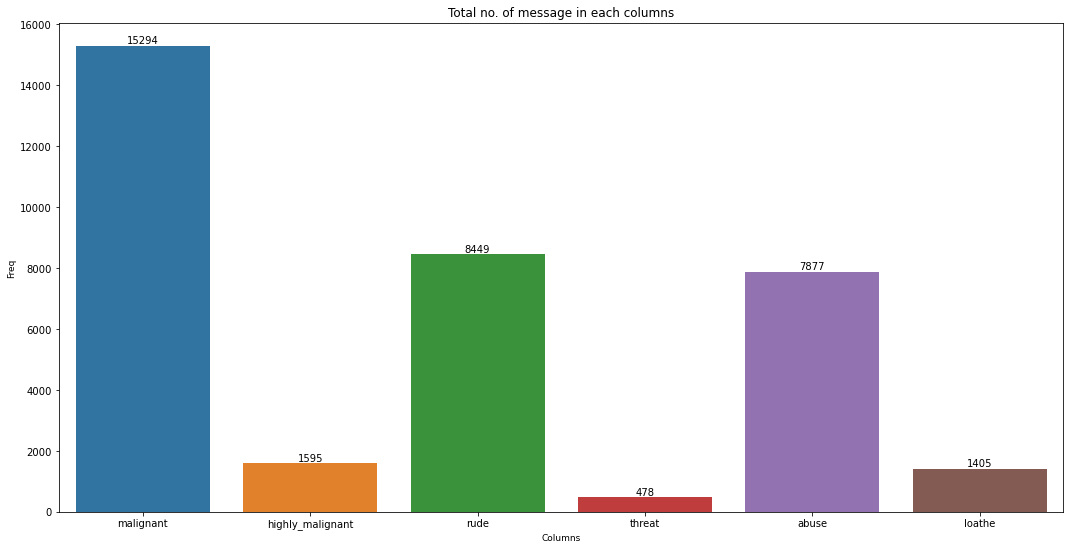

In [40]:
#lets plot and visualize count of each columns
plt.figure(figsize=(18,9))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of message in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+5,label,ha='center',va='bottom')
plt.show()

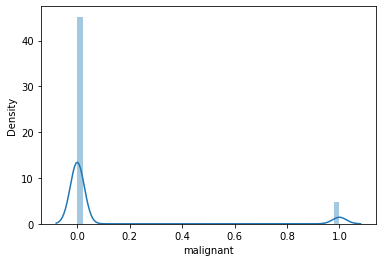

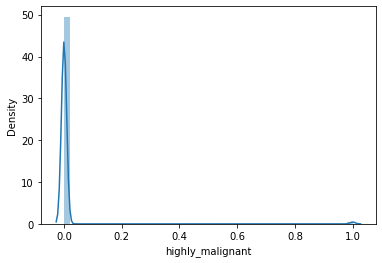

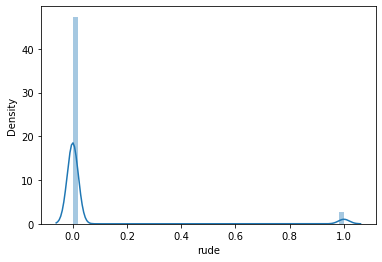

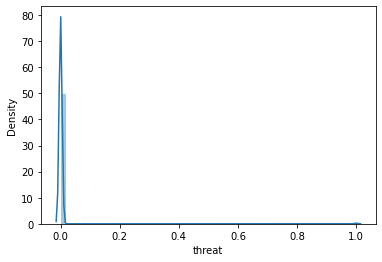

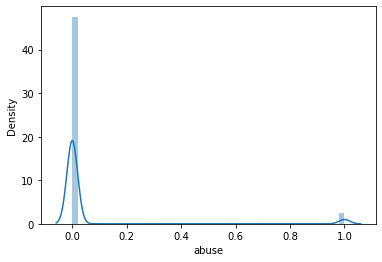

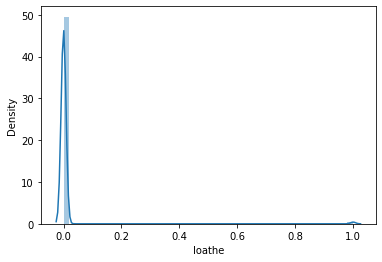

In [41]:
#lets check the distribution of data using distplot
for col in df[featu].describe().columns:
    sns.distplot(df[featu][col])
    plt.show()

here we can see data is skewed towards the right in all the columns

In [42]:
#lets check the statistical description of all the columns
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,394.138847
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,590.725381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,96.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,205.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,436.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


here we can see that only 2 values are present in all the columns i.e 0 and 1.

Low score of standard devaiation tells us that the data is not spreaded

there is difference in mean and median which tells us that some skewnessis present 

very low difference in 75% and max shows that there are no outliers present in the dataset

In [43]:
#lets check the correlation amoung all the columns 
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.054413
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.010175
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.042910
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.007917
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.045027
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.013628
before_clean,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,1.000000
len_after_cleaning,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,1.000000


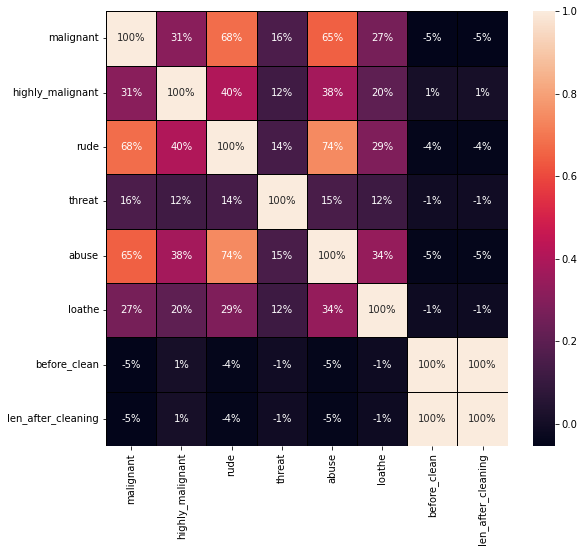

In [44]:
#lets visualize correlation using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),linewidth=0.5, linecolor='black', fmt='.0%',annot=True)
plt.show()

# Data Pre-Processing

In [45]:
#lets create label column in train dataset
c_label = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df[c_label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [46]:
df['label']=df[c_label].sum(axis=1)
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,264,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,112,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,233,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,622,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,67,0


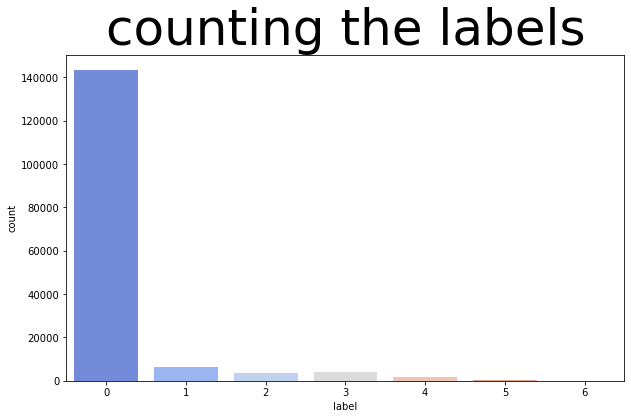

In [52]:
#lets check the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df['label'],palette='coolwarm')
plt.title('counting the labels',fontsize=50)
plt.show()

# Model Building :

## Vectorizer

In [54]:
#lets convert text data using IfiDFvectorizer
#lets import library from vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [55]:
#lets separate the input and output variables represented by x and y respectively in train dataset
X = tfidf.fit_transform(df['comment_text'])

In [56]:
#lets first convert features into number vector
y=df['label']

In [57]:
#lets check the shape of the dataset
print(X.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [58]:
#doing the above process for test data
test_vec = tfidf.fit_transform(df_test['comment_text'])
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [59]:
test_vec.shape

(153164, 14000)

# Building The Model

In [62]:
#splitting the training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [63]:
#checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 14000) 		 (47872, 14000)


In [64]:
#checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)
